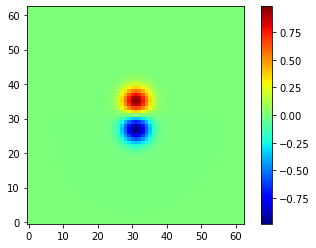

In [100]:
import numpy as np
import math
from matplotlib import pyplot as plt

d = 4; x_0 = 4; dx = 1; N = 31; T = 500; S = 100; grid = np.zeros((2*N+1,2*N+1))     # zdefiniowanie parametrow i siatki zer

def rho(x,y):                                                               # zdefiniowanie funkcji rho jako wspolrzednych
    x_real = (x - N) * dx
    y_real = (y - N) * dx
    return math.exp(-((x_real-x_0)**2+y_real**2)/d**2)-math.exp(-((x_real+x_0)**2+y_real**2)/d**2)

vrho = np.vectorize(rho)
grid = vrho(*np.indices((2*N+1,2*N+1))) 
grid[0,:] = 0; grid[:,0] = 0; grid[-1,:] = 0; grid[:,-1] = 0
plt.imshow(grid,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()

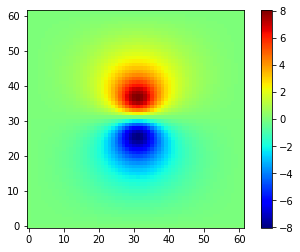

In [101]:
gridA = np.zeros((2*N,2*N))
vrho = np.vectorize(rho)
gridA = vrho(*np.indices((2*N,2*N)))
gridA[0,:] = 0; gridA[:,0] = 0; gridA[-1,:] = 0; gridA[:,-1] = 0

grid1  = np.zeros((2*N,2*N))
grid2  = np.zeros((2*N,2*N))
grid12 = np.zeros((2*N,2*N))
u      = np.zeros((2*N,2*N))

for i in range(T):                                                       # wykonanie T iteracji jako sredniej z sasiadow
    for j in range(1,2*N-1):
        grid1[j] = u[j-1] + u[j+1]
        grid2.T[j] = u.T[j-1] + u.T[j+1]
    grid12 = grid1 + grid2
    u = (grid12 + gridA * dx**2 )/4                                      # wyliczanie funkcji u

plt.imshow(u,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()

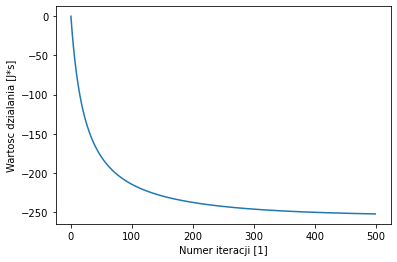

In [102]:
u = np.zeros((2*N,2*N))
grid1 = np.zeros((2*N,2*N))
grid2 = np.zeros((2*N,2*N))
grid3 = np.zeros((2*N,2*N))
grid4 = np.zeros((2*N,2*N))
grid5 = np.zeros((2*N,2*N))
a = np.zeros(T)

for t in range(T):                                            # wykonanie T iteracji w celu pokazania minimalizacji funkcjonalu
    for i in range(1,2*N-1):
        grid1[i] = u[i-1] + u[i+1]
        grid2.T[i] = u.T[i-1] + u.T[i+1]
        grid3[i] = -0.5 * u[i] * (u[i+1]+u[i-1]-2*u[i])/dx**2
        grid4.T[i] = -0.5 * u.T[i] * (u.T[i+1]+u.T[i-1]-2*u.T[i])/dx**2 
        
    ai = grid3 + grid4 - gridA * u
    grid5 = grid1 + grid2
    u = (grid5 + gridA * dx**2)/4
    a[t] = np.sum(np.sum(ai,0))
plt.plot(a)
plt.xlabel('Numer iteracji [1]')
plt.ylabel('Wartosc dzialania [J*s]')
plt.show()

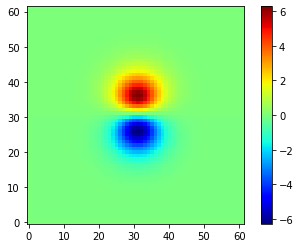

In [103]:
grid1 = np.zeros((2*N,2*N))
grid2 = np.zeros((2*N,2*N))
grid3 = np.zeros((2*N,2*N))
u = np.zeros((2*N,2*N))
for t in range(S):
    for j in range(1,2*N-1):
        grid1[j] = u[j-1] + u[j+1]
        grid2.T[j] = u.T[j-1] + u.T[j+1]
    grid3 = grid1 + grid2
    u = (grid3 + gridA * dx**2)/4
plt.imshow(u,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()

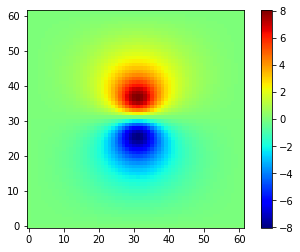

In [104]:
grid1 = np.zeros((2*N,2*N))
grid2 = np.zeros((2*N,2*N))
grid3 = np.zeros((2*N,2*N))
u = np.zeros((2*N,2*N))
for t in range(T):
    for j in range(1,2*N-1):
        grid1[j] = u[j-1] + u[j+1]
        grid2.T[j] = u.T[j-1] + u.T[j+1]
    grid3 = grid1 + grid2
    u = (grid3 + gridA * dx**2)/4
plt.imshow(u,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()

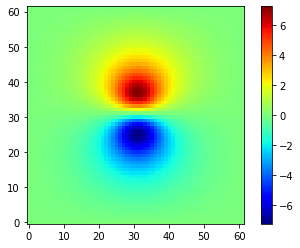

In [105]:
plt.imshow(u - gridA,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()

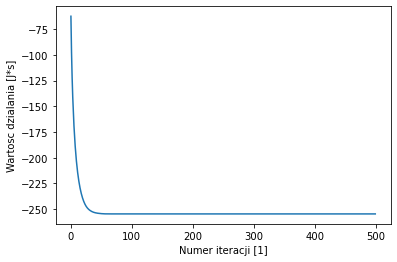

In [106]:
u = np.zeros((2*N,2*N))
a = np.zeros(T)
w = 1.9

for t in range(T):
    for i in range(1,2*N-1):
        for j in range(1,2*N-1):
            u[i][j] = (1-w) * u[i][j] + w*(u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] + gridA[i][j] * dx**2)/4 

    for i in range(1,2*N-1):
        for j in range(1,2*N-1):
            a[t] += -0.5 * u[i][j] * (u[i+1][j]+u[i-1][j]-2*u[i][j])/dx**2 - 0.5 * u[i][j] * (u[i][j+1]+u[i][j-1]-2*u[i][j])/dx**2 - gridA[i][j] * u[i][j]

plt.plot(a)
plt.xlabel('Numer iteracji [1]')
plt.ylabel('Wartosc dzialania [J*s]')
plt.show()